<a href="https://colab.research.google.com/github/Gabrieldiasdeoliveira/Planejamento_Vendas-Analise-De-Take-up-Rate/blob/main/Planejamento_Vendas_Analise_de_Take_up_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pegamos dados aleatórios de vendedores gerados aleatóriamente, para fazer uma analise exploratória. O objetivo desse material é explorar diversas alternativas dos dados, mesmo não conhecendo totalmente as regras de negócio, podemos obter insights para novas abordagens e tomada de decisão.

Nesse material trabalharemos basicamente com estatistica descritiva, analise de variancia(ANOVA), e vamos buscar entender como podemos exploras os dados de umar forma simples, mas muito eficiente.


Dados complementares:
Cada filial tem um custo total de operaçao de R$ 1.2 milhões
O nível de rentabilidade de um cliente é definido pelo Take-up Rate (Índice% resultante da divisão Receita/Volume).

Vamos calcular o Take-up Rate e fazer outras abordagens.

In [ ]:
# Carregar pacotes necessários
library(readxl)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(scales)
library(writexl)

# Carregar os dados das tabelas
faturamento <- read_excel("/faturamento.xlsx")
filial <- read_excel("/filial.xlsx")


In [2]:
# Visualizar as primeiras linhas dos dados
head(faturamento)


CodigoCliente,cliente,canais,executivo,Faturamento,Volume
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
2127,PROSEGUR RS,GESTAO,FLAVIA REGINA LEITE MARINHO,10676.36,59
2175,SIMPALA VEICULOS SA,VAREJO,ALINE GOTTSCHALK DE OLIVEIRA FIDELIZACAO,2180.67,28
2321,FDRH,M. PUBLICO,NEIRI MARIO SCHENCKEL,250.00,33
2469,MUDANCAS GIULIAN,EXPERS,NAIANA CECILIA STROTTMANN FIDELIZACAO,14042.47,52
2662,CARHOUSE VEICULOS LTDA,GESTAO,VANIA PAULO DA SILVA RUCKERT FIDELIZACAO,719.32,42
3096,EDITORA FTD,GESTAO,SUELEN TAIS ARAUJO DA ROSA FIDELIZACAO,3276.94,35


In [3]:
head(filial)

filial,CodigoCliente,NomeCliente
<chr>,<dbl>,<chr>
SP CAP,2127,PROSEGUR RS
MATRIZ,2175,SIMPALA VEICULOS SA
RS,2321,FDRH
MATRIZ,2469,MUDANCAS GIULIAN
MATRIZ,2662,CARHOUSE VEICULOS LTDA
MATRIZ,3096,EDITORA FTD


# Tratamento dos dados

In [4]:
# Relacionar as tabelas "Faturamento" e "Filial" pelo código do cliente
dados_completos <- inner_join(faturamento, filial, by = "CodigoCliente")

In [5]:
head(dados_completos)

CodigoCliente,cliente,canais,executivo,Faturamento,Volume,filial,NomeCliente
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
2127,PROSEGUR RS,GESTAO,FLAVIA REGINA LEITE MARINHO,10676.36,59,SP CAP,PROSEGUR RS
2175,SIMPALA VEICULOS SA,VAREJO,ALINE GOTTSCHALK DE OLIVEIRA FIDELIZACAO,2180.67,28,MATRIZ,SIMPALA VEICULOS SA
2321,FDRH,M. PUBLICO,NEIRI MARIO SCHENCKEL,250.00,33,RS,FDRH
2469,MUDANCAS GIULIAN,EXPERS,NAIANA CECILIA STROTTMANN FIDELIZACAO,14042.47,52,MATRIZ,MUDANCAS GIULIAN
2662,CARHOUSE VEICULOS LTDA,GESTAO,VANIA PAULO DA SILVA RUCKERT FIDELIZACAO,719.32,42,MATRIZ,CARHOUSE VEICULOS LTDA
3096,EDITORA FTD,GESTAO,SUELEN TAIS ARAUJO DA ROSA FIDELIZACAO,3276.94,35,MATRIZ,EDITORA FTD


In [ ]:
attach(dados_completos)

In [7]:
# Verificando a presença de Valores faltantes
dados_completos <- dados_completos %>%
  mutate(Faturamento = as.numeric(Faturamento))

In [8]:
is.na(Faturamento)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
 [13] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE
 [25]  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
 [49]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE
 [85] FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[109] FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
[133] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE
[145] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
[157]  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[181] FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE
[217] FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE
[229] FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE
[241] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE
[277] FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE
[289]  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE

In [9]:
# Nessa etapa eu removi os NA, mas existem outras tratativas que podem ser aplicadas, dependendo da regra e o contexto do negócio.

dados_completos <- dados_completos[complete.cases(dados_completos$Faturamento), ]

In [123]:
#deixando com duas casa decimais
dados_completos$Faturamento <- round(dados_completos$Faturamento, 2)


In [124]:
head(dados_completos)

CodigoCliente,cliente,canais,executivo,Faturamento,Volume,filial,NomeCliente,Índice%
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2127,PROSEGUR RS,GESTAO,FLAVIA REGINA LEITE MARINHO,10676.36,59,SP CAP,PROSEGUR RS,180.96%
2175,SIMPALA VEICULOS SA,VAREJO,ALINE GOTTSCHALK DE OLIVEIRA FIDELIZACAO,2180.67,28,MATRIZ,SIMPALA VEICULOS SA,77.88%
2321,FDRH,M. PUBLICO,NEIRI MARIO SCHENCKEL,250.00,33,RS,FDRH,7.58%
2469,MUDANCAS GIULIAN,EXPERS,NAIANA CECILIA STROTTMANN FIDELIZACAO,14042.47,52,MATRIZ,MUDANCAS GIULIAN,270.05%
2662,CARHOUSE VEICULOS LTDA,GESTAO,VANIA PAULO DA SILVA RUCKERT FIDELIZACAO,719.32,42,MATRIZ,CARHOUSE VEICULOS LTDA,17.13%
3096,EDITORA FTD,GESTAO,SUELEN TAIS ARAUJO DA ROSA FIDELIZACAO,3276.94,35,MATRIZ,EDITORA FTD,93.63%


# Analise Exploratória

In [11]:
# Agrupamento dos dados por filial
dados_agrupados <- dados_completos %>%
  group_by(filial) %>%
  summarise(TotalFaturamento = sum(Faturamento)) %>%
  arrange(desc(TotalFaturamento))

dados_agrupados

filial,TotalFaturamento
<chr>,<dbl>
MATRIZ,1675450.24
PR,1571689.65
MG,1282971.91
SP CAP,889328.42
SP INT,631450.22
GO,493577.17
CE,363624.78
RJ,266276.63
PE,133370.83


In [12]:
# Agrupamento dos dados por canais
dados_agrupados2 <- dados_completos %>%
  group_by(canais) %>%
  summarise(TotalFaturamento = sum(Faturamento)) %>%
  arrange(desc(TotalFaturamento))

dados_agrupados2

canais,TotalFaturamento
<chr>,<dbl>
GESTAO,3682663.340
EXPERS,3625300.620
VAREJO,39962.500
M. PUBLICO,-1537.281


In [13]:
# Agrupamento por filiais e canais
dados_agrupados1 <- dados_completos %>%
  group_by(filial, canais) %>%
  summarise(TotalFaturamento = sum(Faturamento)) %>%
  pivot_wider(names_from = canais, values_from = TotalFaturamento, values_fill = 0)

dados_agrupados1

`summarise()` has grouped output by 'filial'. You can override using the
`.groups` argument.


filial,GESTAO,M. PUBLICO,EXPERS,VAREJO
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
BA,69012.63,0.000,0.00,0.0
CE,363624.78,0.000,0.00,0.0
GO,52000.35,-9392.882,450969.70,0.0
MATRIZ,1536520.75,41752.113,57214.88,39962.5
MG,563629.01,0.000,719342.90,0.0
PA,0.00,-54240.159,0.00,0.0
PE,78203.52,379.900,54787.41,0.0
PR,189525.25,0.000,1382164.40,0.0
RJ,261617.93,0.000,4658.70,0.0


In [14]:
# tirar números com notação cientírica
options(scipen = 999)

# Analise Descritiva
*Nessa etapa vamos fazer uma análise descritiva dos dados, para entender se existem outiliers na base.A análise descritiva é fundamental para qualquer outra etapa posterior.*
*Dois graficos que mostram bem o comportamento dos nossos dados e o boxplot e o grafico de barras, onde ocnseguimos ver a distribuição.*

*Com o boxplot podemos observar a presença de outiliers e com o histograma se os nossos dados tem uma distribuição normal.*

*Inicialmente, a única variável numérica é o faturamento. Portanto, vamos realizar algumas análises descritivas com essa variável.*


In [203]:
#Resumo descritivo do Faturamento
summary(Faturamento)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -54240    1510    7366   34490   31537  611876      86 

# Insights - Canais

*Calcular o resumo do faturamento agrupado por canais.*

In [206]:
resumo_faturamento <- aggregate(Faturamento ~ canais, data = dados_completos, FUN = function(x) c(
  mínimo = round(min(x), 2),
  média = round(mean(x), 2),
  mediana = round(median(x), 2),
  máximo = round(max(x), 2)
))

# Exibir o resumo do faturamento
print(resumo_faturamento)


      canais Faturamento.mínimo Faturamento.média Faturamento.mediana
1     EXPERS             985.05         172633.36            56126.89
2     GESTAO             279.00          28328.18            13014.21
3 M. PUBLICO          -54240.16            -29.01              213.96
4     VAREJO            1300.07           4440.28             2391.21
  Faturamento.máximo
1          611876.40
2          341319.80
3           13846.68
4           11218.27


Canal "EXPERS": Esse canal apresenta um faturamento médio relativamente alto de 172.633,36, com um faturamento mínimo de 985,05 e um máximo de 611.876,40. A mediana de R$ 56.126,89 indica que metade dos valores está abaixo desse ponto. Portanto, pode-se dizer que o canal "EXPERS" tem uma faixa ampla de faturamento, com alguns valores muito altos.

Canal "GESTAO": Esse canal possui um faturamento médio mais baixo em comparação com o canal "EXPERS", com uma média de R$ 28.328,18. O faturamento mínimo é de 279,00 e o máximo é de 341.319,80. A mediana de 13.014,21 indica que a metade dos valores está abaixo desse ponto. Isso sugere que a distribuição de faturamento no canal "GESTAO" é mais concentrada em valores menores.

Canal "M. PUBLICO": Esse canal apresenta um faturamento negativo, com um mínimo de 54.240,16 e uma média de 29,01. No entanto, **a mediana de 213,96 está acima de zero, o que sugere que a maioria dos valores está concentrada em faturamentos positivos.** É importante investigar mais a fundo os fatores que levaram a esses resultados negativos no canal "M. PUBLICO".

Canal "VAREJO": Esse canal possui um faturamento médio relativamente baixo de 4.440,28, com um mínimo de 1.300,07 e um máximo de 11.218,27. A mediana de 2.391,21 indica que a metade dos valores está abaixo desse ponto. Isso sugere que a distribuição de faturamento no canal "VAREJO" é mais concentrada em valores menores.

Canal - M.PUBLICO

In [207]:
# Contar valores acima de zero
acima_zero <- sum(dados_completos$Faturamento[dados_completos$canais == "M. PUBLICO"] > 0)

# Contar valores abaixo de zero
abaixo_zero <- sum(dados_completos$Faturamento[dados_completos$canais == "M. PUBLICO"] < 0)

# Exibir o resultado
print(paste("Valores acima de zero:", acima_zero))
print(paste("Valores abaixo de zero:", abaixo_zero))


[1] "Valores acima de zero: 31"
[1] "Valores abaixo de zero: 7"


# Insights - Filiais
*Vamos revisar e confirmar alguns pontos por meio de cálculos para obter respostas mais precisas. A partir dessas análises iniciais, pudemos obter muitos insights relevantes.*


In [208]:
resumo_faturamento1 <- aggregate(Faturamento ~ filial, data = dados_completos, FUN = function(x) c(
  mínimo = round(min(x), 2),
  média = round(mean(x), 2),
  mediana = round(median(x), 2),
  máximo = round(max(x), 2)
))

# Exibir o resumo do faturamento
print(resumo_faturamento1)

   filial Faturamento.mínimo Faturamento.média Faturamento.mediana
1      BA               0.00          23004.21            14631.02
2      CE               0.00          36362.48            19059.49
3      GO           -7295.51          61697.15                0.00
4  MATRIZ           -3433.76          13846.70             5009.44
5      MG           29350.99         183281.70            39233.44
6      PA          -54240.16         -54240.16           -54240.16
7      PE             379.90          13337.08             5824.85
8      PR            4335.94         104779.31            25630.02
9      RJ             985.05          53255.33            31972.94
10     RS            -136.01           2170.62              566.44
11 SP CAP            9601.97         111166.05            41550.42
12 SP INT            1413.60          45103.59            15719.81
   Faturamento.máximo
1            54381.61
2           145021.51
3           450969.70
4           109618.42
5           611876.

A filial "BA" apresenta um faturamento médio de R$23.004,21 e uma mediana de R$14.631,02, indicando uma distribuição de faturamento relativamente dispersa, com valores que variam consideravelmente.

A filial "CE" possui um faturamento médio de 36,362.48 e uma mediana de 19,059.49, sugerindo uma concentração de faturamento em valores menores.

A filial "GO" apresenta um faturamento mínimo negativo de -7,295.51, com uma média de 61,697.15. É importante investigar os fatores que contribuíram para esse resultado negativo.

A filial "MATRIZ" tem um faturamento médio de 13,846.70 e uma mediana de 5,009.44. Isso indica que a maioria dos valores estão acima da mediana.

A filial "MG" possui um faturamento médio relativamente alto de 183,281.70, indicando um desempenho financeiro positivo.

A filial "PA" apresenta um faturamento negativo em todos os resultados, requerendo uma análise mais aprofundada das causas desse resultado.

A filial "PE" tem um faturamento médio de 13,337.08 e uma mediana de 5,824.85, sugerindo uma concentração de faturamento em valores menores.

A filial "PR" apresenta números que indicam uma variação considerável no faturamento.

A filial "RJ" possui um faturamento médio de 53,255.33 e uma mediana de 31,972.94, indicando uma distribuição de faturamento relativamente dispersa.

A filial "RS" apresenta um faturamento médio de 2,170.62, sugerindo um desempenho financeiro mais baixo em comparação com outras filiais.

A filial "SP CAP" tem um faturamento médio de 111,166.05, indicando um desempenho financeiro positivo.

A filial "SP INT" possui um faturamento médio de 45,103.59, sugerindo um desempenho financeiro acima da média geral.

*Filial - Matriz*

In [209]:
# Filtrar os valores da filial "MATRIZ"
faturamento_matriz <- subset(dados_completos, filial == "MATRIZ")$Faturamento

# Contar quantos valores estão abaixo da mediana
count_below_median <- sum(faturamento_matriz < median(faturamento_matriz))

# Contar quantos valores estão acima ou igual à mediana
count_above_median <- sum(faturamento_matriz >= median(faturamento_matriz))

# Exibir o resultado
print(paste("Valores abaixo da mediana:", count_below_median))
print(paste("Valores acima ou igual à mediana:", count_above_median))


[1] "Valores abaixo da mediana: 60"
[1] "Valores acima ou igual à mediana: 61"


*Filial - PE*

In [210]:
# Filtrar os valores da filial "PE"
faturamento_pe <- subset(dados_completos, filial == "PE")$Faturamento

# Verificar a proporção de valores acima de 10.000
prop_acima_de_10000 <- mean(faturamento_pe > 10000)

# Exibir o resultado
print(paste("Proporção de valores acima de 10.000:", prop_acima_de_10000))


[1] "Proporção de valores acima de 10.000: 0.3"


# Outliers


Análise para observar de forma gráfica os outliers. Foi possível identificar a presença de outliers, incluindo valores negativos considerados como outliers.

---



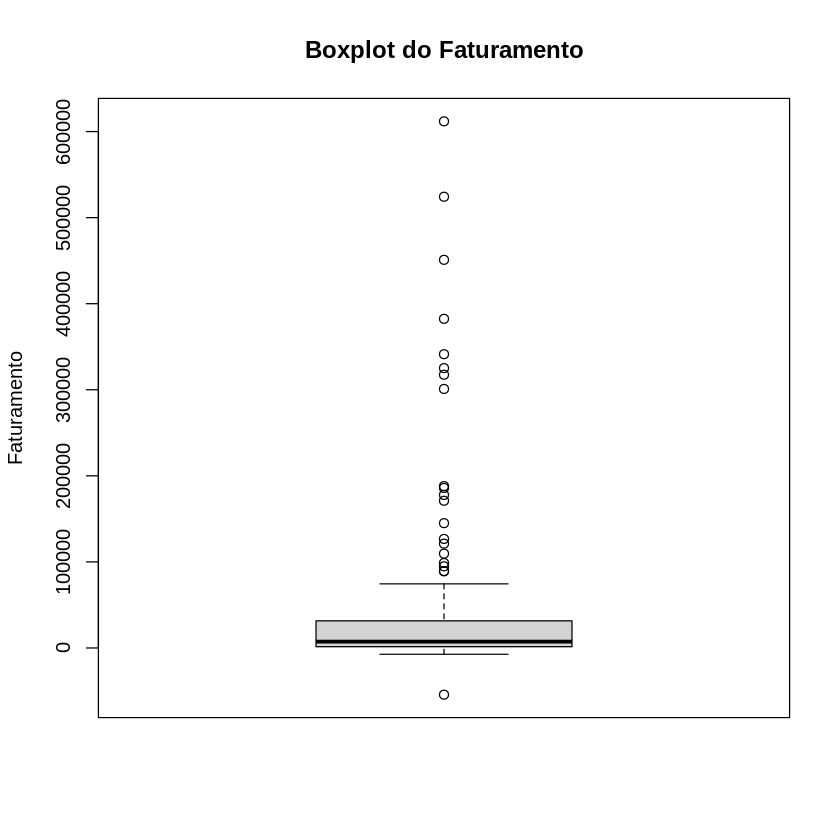

In [15]:
# boxplot para gerar o gráfico
boxplot(dados_completos$Faturamento, main = "Boxplot do Faturamento", ylab = "Faturamento")


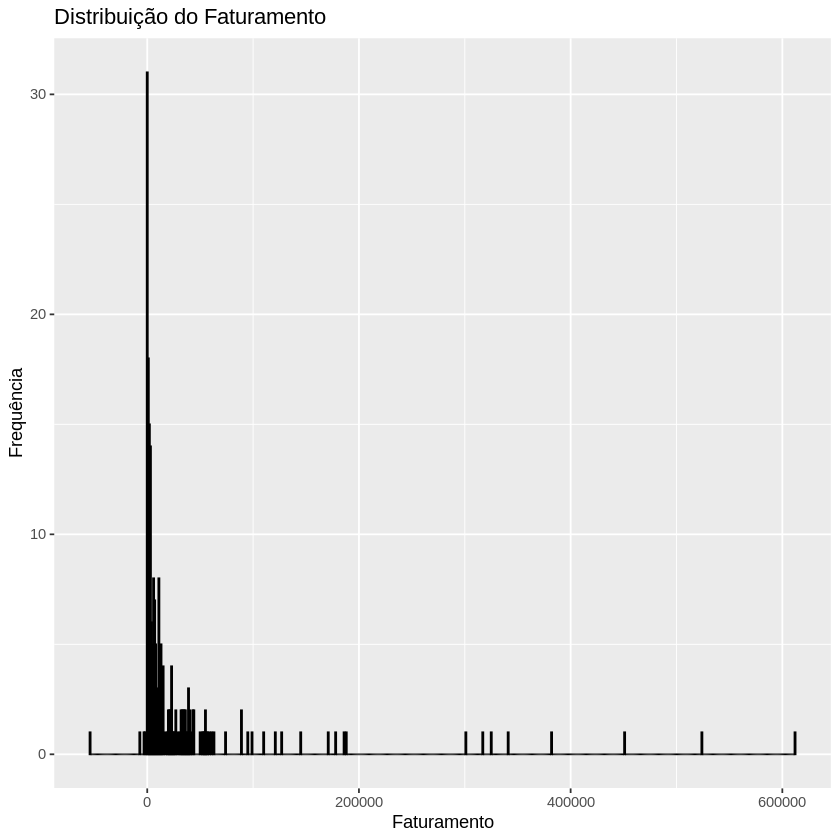

In [16]:
# Histograma - Para entender a distribuição dos dados.
ggplot(dados_completos, aes(x = Faturamento)) +
  geom_histogram(binwidth = 1000, fill = "blue", color = "black") +
  labs(title = "Distribuição do Faturamento", x = "Faturamento", y = "Frequência")

Vamos identificar os outliers, tanto positivos quanto negativos, e verificar quais são os executivos associados a eles.

In [213]:
# Calcular os limites superior e inferior
Q1 <- quantile(dados_completos$Faturamento, 0.25)
Q3 <- quantile(dados_completos$Faturamento, 0.75)
IQR <- Q3 - Q1
limite_inferior <- Q1 - 1.5 * IQR
limite_superior <- Q3 + 1.5 * IQR

outliers <- dados_completos[dados_completos$Faturamento < limite_inferior | dados_completos$Faturamento > limite_superior, ]
outliers <- outliers[order(outliers$Faturamento, decreasing = TRUE), ]


In [214]:
# Exibir as linhas com outliers
outliers

CodigoCliente,cliente,canais,executivo,Faturamento,Volume,filial,NomeCliente,Índice%
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
37521,TRANSPORTES FATIMA,EXPERS,WELLINGTON MARCAL SILVA,611876.40,11,MG,TRANSPORTES FATIMA,55625.13
49249,COSTEIRA TRANSPORTES FROTA,EXPERS,SEM ALOCACAO,524284.95,58,SP CAP,COSTEIRA TRANSPORTES FROTA,9039.40
34161,CARVALIMA TRANSPORTES,EXPERS,ELIANA DAL PONTE FARIAS,450969.70,53,GO,CARVALIMA TRANSPORTES,8508.86
6862,RAPIDO TRANSPAULO LTDA,EXPERS,DAIANE GOMES FALCAO,382434.33,21,PR,RAPIDO TRANSPAULO LTDA,18211.16
10166,ENGELMIG,GESTAO,MARINA DAMAZIO GODOY DE ABREU,341319.80,21,MG,ENGELMIG,16253.32
14304,COMERCIO E TRANSPORTES MIORANZA LTDA,EXPERS,DAIANE GOMES FALCAO,325155.61,43,PR,COMERCIO E TRANSPORTES MIORANZA LTDA,7561.76
27843,SULINA,EXPERS,DAIANE GOMES FALCAO,317481.51,34,PR,SULINA,9337.69
9112,MULTITRANS,EXPERS,DAIANE GOMES FALCAO,300966.06,44,PR,MULTITRANS,6840.14
35421,VITORIA TRANSPORTES EM GERAL S A,EXPERS,ELISANDRA PAULA CENTAMORI PAULINO,188059.84,41,SP INT,VITORIA TRANSPORTES EM GERAL S A,4586.83


Com essa analise, conseguimos observar que a WELLINGTON MARCAL SILVA, no canal EXPERS, possui o faturamento mais alto. Ele se destaca como o principal executivos em termos de faturamento.

Francisco Eugenio Freitas Rodrigues, no canal M. PUBLICO, apresenta um faturamento negativo de -R$ 54.240,16 e um volume de 55. É importante investigar os motivos que levaram a esse resultado negativo e avaliar possíveis melhorias.

Esses insights indicam a importância de monitorar e analisar o desempenho dos executivos em relação ao faturamento e volume, a fim de identificar pontos fortes e áreas de melhoria. É fundamental acompanhar de perto o desempenho de cada executivo para tomar decisões estratégicas e maximizar os resultados da empresa.

# Análise de variância (ANOVA)
*A Análise de Variância (ANOVA) é um teste estatístico chave e muito útil para análise de datasets em diversas áreas do conhecimento. A análise visa, fundamentalmente, verificar se existe uma diferença significativa entre as médias e se os fatores exercem influência em alguma variável dependente.*

# Legenda
*Df: Os graus de liberdade indicam o número de grupos (filiais ou canais) e o número de observações restantes (residuals).*

*Sum Sq: A soma dos quadrados representa a variabilidade total explicada pela variável "filial/canais" e a variabilidade não explicada (residual).*

*Mean Sq: A média dos quadrados é calculada dividindo a soma dos quadrados pelos graus de liberdade correspondentes.*

*F value: O valor F é uma medida da diferença entre as médias dos grupos e a variabilidade dentro dos grupos.*

*Pr(>F): O valor p representa a probabilidade de obter uma estatística F igual ou mais extrema do que a observada, assumindo que a hipótese nula seja verdadeira. Um valor de p pequeno (geralmente menor que 0,05) indica uma diferença estatisticamente significativa*

In [19]:
# Realizar análise de variância
modelo_anova <- aov(Faturamento ~ filial, data = dados_completos)

# Resumo do modelo ANOVA
resumo_anova <- summary(modelo_anova)


# Exibir o resumo do modelo ANOVA
print(resumo_anova)


             Df        Sum Sq     Mean Sq F value       Pr(>F)    
filial       11  361206888442 32836989858   5.905 0.0000000268 ***
Residuals   201 1117749931031  5560944931                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


*No caso das filiais, o resultado mostra um valor de p muito pequeno (p = 0.0000000268), indicando que há uma diferença estatisticamente significativa nas médias do faturamento entre as filiais. Isso sugere que a variável "filial" está associada ao faturamento e pode ser um fator importante na determinação das diferenças observadas.*

*É importante observar que devemos interpretar esses resultados considerando no contexto específico do conjunto de dados e o objetivo da análise. A análise de variância é útil para testar diferenças entre grupos, Podem ser feitas  análises adicionais, como testes de comparação múltipla, para identificar quais filiais têm médias de faturamento significativamente diferentes umas das outras.*

In [20]:
# Realizar a análise de variância
modelo_anova1 <- aov(Faturamento ~ canais, data = dados_completos)

# Resumo do modelo ANOVA
resumo_anova1 <- summary(modelo_anova1)

# Exibir o resumo do modelo ANOVA
print(resumo_anova1)

             Df        Sum Sq      Mean Sq F value              Pr(>F)    
canais        3  476970850580 158990283527   33.16 <0.0000000000000002 ***
Residuals   209 1001985968893   4794191239                                
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


*No caso dos canais, o resultado mostra um valor de p muito pequeno (p < 0.0000000000000002), indicando que há uma diferença estatisticamente significativa nas médias do faturamento entre os canais. Isso sugere que a variável "canais" está associada ao faturamento e pode ser um fator importante na determinação das diferenças observadas.*

*Assim como no caso das filiais, é importante observar devemos interpretar esses resultados considerando o contexto específico do conjunto de dados e o objetivo da análise.*






# Análise de Take-up Rate

In [55]:
head(dados_completos)

CodigoCliente,cliente,canais,executivo,Faturamento,Volume,filial,NomeCliente,Rentabilidade
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
2127,PROSEGUR RS,GESTAO,FLAVIA REGINA LEITE MARINHO,10676.36,59,SP CAP,PROSEGUR RS,180.955254
2175,SIMPALA VEICULOS SA,VAREJO,ALINE GOTTSCHALK DE OLIVEIRA FIDELIZACAO,2180.67,28,MATRIZ,SIMPALA VEICULOS SA,77.881071
2321,FDRH,M. PUBLICO,NEIRI MARIO SCHENCKEL,250.00,33,RS,FDRH,7.575758
2469,MUDANCAS GIULIAN,EXPERS,NAIANA CECILIA STROTTMANN FIDELIZACAO,14042.47,52,MATRIZ,MUDANCAS GIULIAN,270.047500
2662,CARHOUSE VEICULOS LTDA,GESTAO,VANIA PAULO DA SILVA RUCKERT FIDELIZACAO,719.32,42,MATRIZ,CARHOUSE VEICULOS LTDA,17.126667
3096,EDITORA FTD,GESTAO,SUELEN TAIS ARAUJO DA ROSA FIDELIZACAO,3276.94,35,MATRIZ,EDITORA FTD,93.626857


*Cada filial tem um custo total de operaçao de R$ 1.2 milhões*

*O nível de rentabilidade de um cliente é definido pelo Take-up Rate (Índice% resultante da divisão Receita/Volume)*

In [144]:
dados_completos <- dados_completos %>%
                   mutate(`Índice%` = paste0(round(Faturamento / Volume, 2)))


In [147]:
head(dados_completos)

CodigoCliente,cliente,canais,executivo,Faturamento,Volume,filial,NomeCliente,Índice%
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2127,PROSEGUR RS,GESTAO,FLAVIA REGINA LEITE MARINHO,10676.36,59,SP CAP,PROSEGUR RS,180.96
2175,SIMPALA VEICULOS SA,VAREJO,ALINE GOTTSCHALK DE OLIVEIRA FIDELIZACAO,2180.67,28,MATRIZ,SIMPALA VEICULOS SA,77.88
2321,FDRH,M. PUBLICO,NEIRI MARIO SCHENCKEL,250.00,33,RS,FDRH,7.58
2469,MUDANCAS GIULIAN,EXPERS,NAIANA CECILIA STROTTMANN FIDELIZACAO,14042.47,52,MATRIZ,MUDANCAS GIULIAN,270.05
2662,CARHOUSE VEICULOS LTDA,GESTAO,VANIA PAULO DA SILVA RUCKERT FIDELIZACAO,719.32,42,MATRIZ,CARHOUSE VEICULOS LTDA,17.13
3096,EDITORA FTD,GESTAO,SUELEN TAIS ARAUJO DA ROSA FIDELIZACAO,3276.94,35,MATRIZ,EDITORA FTD,93.63


# Vamos verificar a média por filia

*Vamos trabalhar com os valores dos índices. Fiquei com algumas dúvidas durante essa etapa. Se alguém tiver algum feedback sobre se o raciocínio está correto (não apenas nessa etapa, mas em toda a análise), será bem-vindo.*

In [142]:
# Verificar o tipo de dados da coluna Índice%
print(class(dados_completos$`Índice%`))

# Converter a coluna para o tipo numérico
dados_completos$`Índice%` <- as.numeric(dados_completos$`Índice%`)

# Calcular a média do índice por filial
media_por_filial <- aggregate(`Índice%` ~ filial, data = dados_completos, FUN = mean)

# Arredondar a média para duas casas decimais
media_por_filial$`Índice%` <- round(media_por_filial$`Índice%`, 2)

# Exibir o resultado
print(media_por_filial)


[1] "numeric"
   filial  Índice%
1      BA   686.48
2      CE  1387.72
3      GO  1132.19
4  MATRIZ   545.90
5      MG 11331.19
6      PA  -986.18
7      PE   404.65
8      PR  3639.70
9      RJ  1318.23
10     RS    85.44
11 SP CAP  2209.72
12 SP INT  1203.78


In [167]:
# Verificar o tipo de dados da coluna Índice%
print(class(dados_completos$`Índice%`))

# Converter a coluna para o tipo numérico
dados_completos$`Índice%` <- as.numeric(dados_completos$`Índice%`)

# Calcular a variação do índice por filial
variacao_por_filial <- aggregate(`Índice%` ~ filial, data = dados_completos, FUN = function(x) max(x) - min(x))

# Exibir o resultado
print(variacao_por_filial)


[1] "numeric"
   filial  Índice%
1      BA  1394.40
2      CE  6905.79
3      GO  8938.01
4  MATRIZ  5769.00
5      MG 54942.99
6      PA     0.00
7      PE  1226.18
8      PR 18110.32
9      RJ  3989.79
10     RS   630.87
11 SP CAP  8879.37
12 SP INT  4558.56


In [136]:
# Exportar o data frame para um arquivo CSV no Google Colab
write.csv(dados_completos, file = "/content/dados_completos.csv", row.names = FALSE)